##### 1.1 - DISTRIBUIÇÃO NORMAL

3. MLP

In [1]:
import numpy as np
import matplotlib.pyplot as plt

São definidos as funções para o MLP

In [2]:
def activation_y(u):
    return np.tanh(u)

def derivActivation_y(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def derivActivation_h(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def activation_h(u):
    return np.tanh(u)

def trainMLP(x, y, p, eta, tol, maxEpocas):
    m = y.shape[1]
    n = np.shape(x)[1]
    N = np.shape(x)[0]
    z = np.matrix(np.random.rand(n+1,p)-0.5)
    w = np.matrix(np.random.rand(p+1,m)-0.5)
    
    xAtual = np.zeros((1, n+1))
    nEpocas = 0
    erroEpoca = tol+1
    evec = [[0]]

    while erroEpoca > tol and nEpocas < maxEpocas - 1:
        ei2 = 0
        xseq = np.arange(N)

        for i in range(N):
            irand = xseq[i]
            xAtual[0,:-1] = x[irand]
            xAtual[0,-1] = 1
            yAtual = y[irand]

            U = np.array(np.dot(xAtual,z), ndmin = 2)
            h_i = activation_h(U)
            hBias = np.append(h_i,[[1]],axis=1)

            yhat_i = np.array(np.dot(hBias, w), ndmin=2)
            yhatClass_i = activation_y(yhat_i)

            e_i = yAtual - yhatClass_i
            flinhaO = derivActivation_y(yhat_i)
            dO= e_i*flinhaO

            wMinus = w[:-1, :]
            eHidden = np.dot(dO, wMinus.T)
            flinhaU = derivActivation_h(U)
            dU = np.multiply(eHidden, flinhaU)

            w = w +eta*np.dot(hBias.T, dO)
            z = z +eta*np.dot(xAtual.T, dU)
            ei2 = ei2 + np.dot(e_i, e_i.T)

        if nEpocas == 0: evec[0] = np.squeeze(ei2/N)
        nEpocas += 1
        evec = np.append(evec, np.squeeze(ei2/N))
        erroEpoca = evec[nEpocas]

    return w, z, evec
    
def yMLP(x, z, w):
  x = np.append(x, np.ones((x.shape[0],1)), axis = 1)
  h_hat = activation_h(np.dot(x,z))
  h_bias = np.append(h_hat, np.ones((h_hat.shape[0], 1)), axis = 1)
  output = np.dot(h_bias, w)
  yEval = activation_y(output)
  
  return yEval

def errorCalc(yEval, actualClass):
    error = np.multiply(actualClass != yEval, 1)
    meanError = np.mean(error)
    stdError = np.std(error)
    accuracy = 1 - meanError
    errorTest = np.dot(error, error.T)
    errorTest_MS = np.mean(errorTest)

    return accuracy, stdError, errorTest_MS

Inicialmente define-se os input de dados para a distribuição normal.

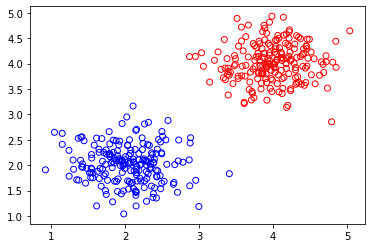

In [3]:
N = 0
N_points = 200

sigma_1 = sigma_2 = sigma_3 = sigma_4 =  0.4**2

mu_x_1 = mu_y_1 = 2
mu_x_2 = mu_y_2 = 4

mean_1 = [mu_x_1, mu_y_1]
cov_1 = [[sigma_1, 0], [0, sigma_1]]
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, N_points).T

mean_2 = [mu_x_2, mu_y_2]
cov_2 = [[sigma_2, 0], [0, sigma_2]]
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, N_points).T

N = x1.shape[0]

plt.scatter(x1, y1, color = 'b', facecolor = 'none')
plt.scatter(x2, y2, color = 'r', facecolor = 'none')
plt.show()

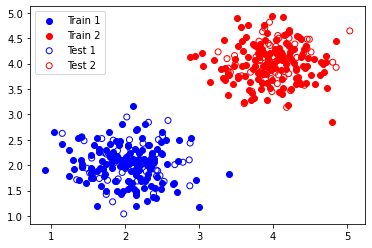

In [4]:
trainSize = int(0.7*N)
testSize = N - trainSize

# TRAIN
train_index = np.random.choice(np.arange(N), trainSize, replace = False)
train_index = np.sort(train_index)

x1_train = x1[train_index]
x1_train = np.resize(x1_train, (trainSize, 1))
x2_train = x2[train_index]
x2_train = np.resize(x2_train, (trainSize, 1))

y1_train = y1[train_index]
y1_train = np.resize(y1_train, (trainSize, 1))
y2_train = y2[train_index]
y2_train = np.resize(y2_train, (trainSize, 1))

# TEST
test_index = np.delete(np.arange(N), train_index)

x1_test = x1[test_index]
x1_test = np.resize(x1_test, (testSize, 1))
x2_test = x2[test_index]
x2_test = np.resize(x2_test, (testSize, 1))

y1_test = y1[test_index]
y1_test = np.resize(y1_test, (testSize, 1))
y2_test = y2[test_index]
y2_test = np.resize(y2_test, (testSize, 1))

# PLOT
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.show()

São definido as classes de treino e de testes.

In [5]:
xin_train_1 = np.concatenate((x1_train, y1_train), axis = 1)
xin_train_2 = np.concatenate((x2_train, y2_train), axis = 1)
xin_train_1_2 = np.concatenate((xin_train_1, xin_train_2), axis = 0)
xin_train = np.array(xin_train_1_2)

###
actual_test = np.concatenate((-1*np.ones((testSize, 1)), np.ones((testSize, 1))))
test_1 = np.concatenate((x1_test, y1_test), axis = 1)
test_2 = np.concatenate((x2_test, y2_test), axis = 1)
test_range = np.concatenate((test_1, test_2), axis = 0)

###
class_train_1 = -1*np.ones((x1_train.shape[0], 1))
class_train_2 = np.ones((x2_train.shape[0], 1))
class_train = np.concatenate((class_train_1, class_train_2), axis = 0)

Treina-se então o modelo e plota o erro por epoca deste. Tem-se ainda a acurácia para o modelo.

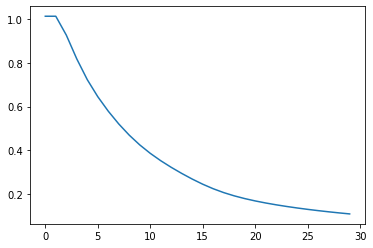

   Acurácia  Desvio Padrão  Erro Médio Quadrático
0  0.966667       0.179505               0.001111


In [6]:
eta = 0.001
max_epocas = 30
p_in = 12
tol = 1e-6

x_train = xin_train
y_train = class_train

wt, zt, erroEpocas = trainMLP(x_train, y_train, p_in, eta, tol, max_epocas)

plt.plot(erroEpocas)
plt.show()

test_set = np.array(test_range)
yEval = np.sign(np.squeeze(yMLP(test_set, zt, wt))).T
scores = errorCalc(yEval, actual_test)
scores = pd.DataFrame(np.array(scores, ndmin = 2), columns = ['Acurácia', 'Desvio Padrão', 'Erro Médio Quadrático'])
print(scores)

É feito então a exibição dos resultados, com a curva de separação.

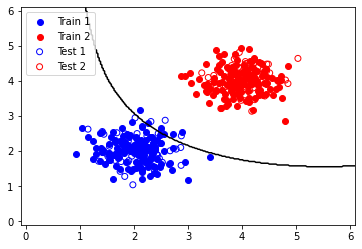

In [7]:
# matrix de pontos xy
xgrid = np.linspace(-0.1, 6.1, 250)
ygrid = np.linspace(-0.1, 6.1, 250)
xygrid = np.zeros((xgrid.shape[0]*ygrid.shape[0], 2))
xMeshGrid, yMeshGrid = np.meshgrid(xgrid, ygrid)
classMeshgrid = np.zeros((xgrid.shape[0], ygrid.shape[0]))

for i, i_pt in enumerate(xgrid):
    for j, j_pt in enumerate(ygrid):
        H = activation_h(np.dot(np.array([j_pt, i_pt, 1]), zt))
        H_bias = np.append(H, [[1]], axis = 1)
        xyClass = np.sign(activation_y(np.dot(H_bias, wt)))
        classMeshgrid[i, j] = xyClass

###
plt.scatter(x1_train, y1_train, color='b')
plt.scatter(x2_train, y2_train, color='r')
plt.scatter(x1_test, y1_test, color='b', facecolor='none')
plt.scatter(x2_test, y2_test, color='r', facecolor='none')
plt.legend(['Train 1', 'Train 2', 'Test 1', 'Test 2'])
plt.contour(xMeshGrid, yMeshGrid, classMeshgrid, colors=['k'], levels = 0)
plt.show()